In [ ]:
pip install pillow


# **Importing Necessary Libraries**

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from pathlib import Path

# **Downloading the Tensorflow Flower Dataset**

In [2]:
data = tf.keras.utils.get_file(origin = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
                               cache_dir='.',
                               untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
dataset = Path("/content/datasets/flower_photos.tgz/flower_photos")
flowers = []
for i in dataset.iterdir():
  if i.is_dir() and not i.name.startswith("."):
      flowers.append(i)
flowers

[PosixPath('/content/datasets/flower_photos.tgz/flower_photos/daisy'),
 PosixPath('/content/datasets/flower_photos.tgz/flower_photos/tulips'),
 PosixPath('/content/datasets/flower_photos.tgz/flower_photos/sunflowers'),
 PosixPath('/content/datasets/flower_photos.tgz/flower_photos/roses'),
 PosixPath('/content/datasets/flower_photos.tgz/flower_photos/dandelion')]

# **Displaying Sample Data**

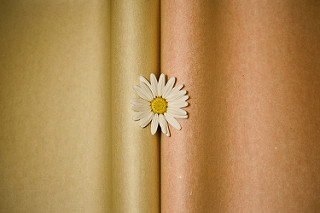

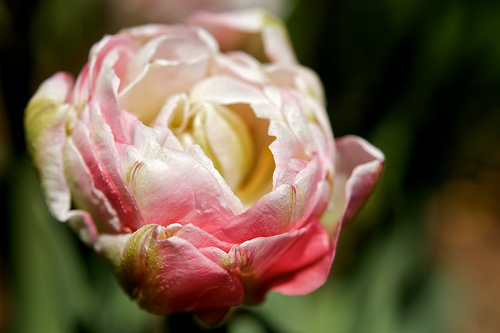

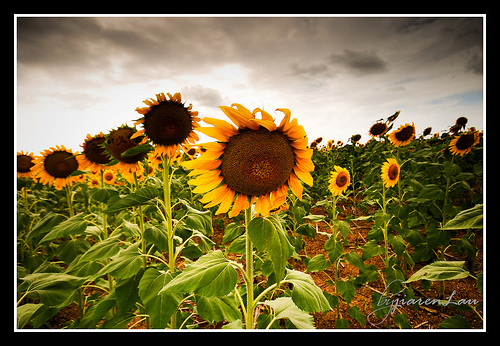

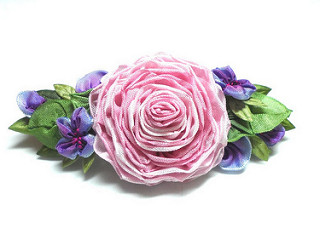

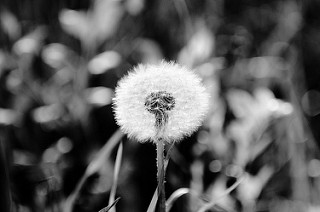

In [4]:
for i in flowers:
  c = 0
  for j in i.glob("*jpg"):
    obj = Image.open(str(j))
    display(obj)
    c = c + 1
    if c==1 :
      break


# **Reading the Images in the form of 3D matrices (R,G,B)**

In [4]:
dic = {}
for i,j in enumerate(flowers):
  dic[i] = j.name

X_data,Y_data = [],[]

for labels,i in enumerate(flowers):
  for j in i.glob("*.jpg"):
    img = cv2.cvtColor(cv2.imread(j), cv2.COLOR_BGR2RGB)
    X_data.append(img)

    Y_data.append(labels)

In [5]:
Y_data = np.array(Y_data)
dic

{0: 'daisy', 1: 'tulips', 2: 'sunflowers', 3: 'roses', 4: 'dandelion'}

#**Data Preprocessing : Setting all the Images to be of size 256 x 256**

In [6]:
X_data_resized = [cv2.resize(i,(256,256),interpolation=cv2.INTER_AREA) for i in X_data]
X_data_resized = np.array(X_data_resized)

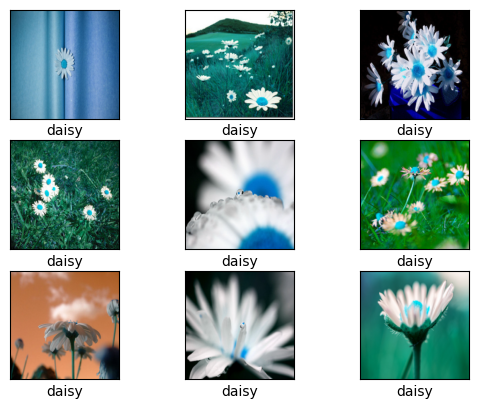

In [8]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_data_resized[i])
  plt.xlabel(dic[Y_data[i]])
  plt.xticks([])
  plt.yticks([])


# **Sample data transformation through Augmentation to remove overfitting**

In [46]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape = (256,256,3)),
    tf.keras.layers.RandomContrast(0.8),
    tf.keras.layers.RandomRotation(factor = 0.7),
    tf.keras.layers.RandomZoom(0.2),
])


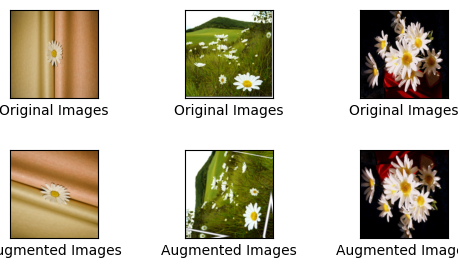

In [69]:
for i in range(3):
  plt.subplot(3,3,i+1)
  plt.imshow(X_data_resized[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("Original Images")
  plt.subplot(3,3,i+4)
  plt.imshow(augmentation(X_data_resized[:5])[i].numpy().astype("uint8"))
  plt.xlabel("Augmented Images")
  plt.xticks([])
  plt.yticks([])
  plt.subplots_adjust(hspace=0.6, wspace=0.2)

In [71]:
#Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomRotation(factor = 0.3),
    tf.keras.layers.RandomZoom(0.2),])

model = tf.keras.Sequential([

    tf.keras.layers.Input(shape=(256,256,3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1.0/255),    #Normalizing the data within 0 to 1

    #Convolutions and Max Pooling
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',strides=1,padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',strides=1,padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',strides=1,padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',strides=1,padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.5), # Added Dropout layer
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])

model.compile(optimizer='adam',loss = "sparse_categorical_crossentropy",metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_23 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │     3,276,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,138,937 (38.68 MB)

 Trainable params: 3,379,645 (12.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,759,292 (25.78 MB)

# ***Splitting the dataset into Training and Testing Dataset and again Splitting Training Data into Actual Training and Validation Data***

In [70]:
from sklearn.model_selection import train_test_split

trainX, X_test, trainY, Y_test = train_test_split(
    X_data_resized,
    Y_data,
    test_size=0.1,
    stratify=Y_data,
    random_state=42
)
X_train, X_val, Y_train, Y_val = train_test_split(
    trainX,
    trainY,
    test_size=0.2,
    stratify=trainY,
    random_state=42
)


# ***Training for 100 Epochs and 32 batches***

In [99]:
model.fit(X_train,Y_train,epochs=100,validation_data=(X_val,Y_val))

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7872 - loss: 0.5261 - val_accuracy: 0.7564 - val_loss: 0.7480
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7749 - loss: 0.5410 - val_accuracy: 0.7595 - val_loss: 0.6102
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7900 - loss: 0.5086 - val_accuracy: 0.7519 - val_loss: 0.7002
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7939 - loss: 0.5219 - val_accuracy: 0.7383 - val_loss: 0.6975
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7972 - loss: 0.5289 - val_accuracy: 0.7534 - val_loss: 0.6391
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7973 - loss: 0.5140 - val_accuracy: 0.7504 - val_loss: 0.6381
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8068 - loss: 0.5015 - val_accuracy: 0.7610 - val_loss: 0.6293
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7988 - loss: 0.4945 - val_accuracy: 0.

In [100]:
model.evaluate(X_test,Y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8425 - loss: 0.5917


[0.6519485712051392, 0.8147138953208923]

In [101]:
results = model.predict(X_test)
predictions = [np.argmax(results[i]) for i in range(len(X_test))]


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [102]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        63
           1       0.79      0.82      0.80        80
           2       0.88      0.81      0.84        70
           3       0.76      0.69      0.72        64
           4       0.80      0.91      0.85        90

    accuracy                           0.81       367
   macro avg       0.82      0.81      0.81       367
weighted avg       0.82      0.81      0.81       367



<Axes: >

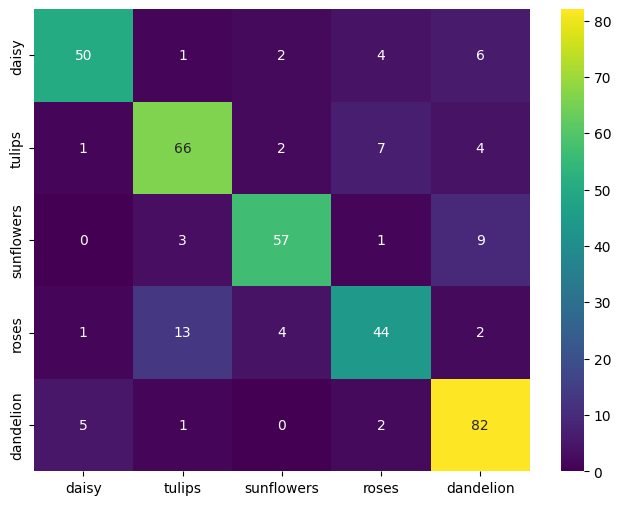

In [104]:
cm = confusion_matrix(Y_test,predictions)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm,annot=True,cmap="viridis",xticklabels = dic.values(),yticklabels=dic.values())